In [110]:
import codecs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
nomLexiqueOrg="/Users/gilles/ownCloud/Python/phonemisation/Lexique380-UTF8.txt"
nomLexiqueOrg="/Volumes/gilles/Transfert/Copies-iMac-GB/Python/phonemisation/Lexique380-UTF8.txt"
#nomFlexiqueVerbes="/Users/gilles/Github/flexique/data/vlexique.csv"
Lexique3=pd.read_csv(nomLexiqueOrg,sep="\t")
#vlexique=pd.read_csv(nomFlexiqueVerbes,sep=",",header=None)

In [7]:
Lexique3.columns#, vlexique.columns

Index([u'1_ortho', u'2_phon', u'3_lemme', u'4_cgram', u'5_genre', u'6_nombre',
       u'7_freqlemfilms2', u'8_freqlemlivres', u'9_freqfilms2',
       u'10_freqlivres', u'11_infover', u'12_nbhomogr', u'13_nbhomoph',
       u'14_islem', u'15_nblettres', u'16_nbphons', u'17_cvcv', u'18_p_cvcv',
       u'19_voisorth', u'20_voisphon', u'21_puorth', u'22_puphon', u'23_syll',
       u'24_nbsyll', u'25_cv-cv', u'26_orthrenv', u'27_phonrenv',
       u'28_orthosyll', u'29_cgramortho', u'30_deflem', u'31_defobs',
       u'32_old20', u'33_pld20', u'34_morphoder', u'35_nbmorph'],
      dtype='object')

In [8]:
lex3=Lexique3[["1_ortho","2_phon","3_lemme","4_cgram","5_genre","6_nombre","7_freqlemfilms2","8_freqlemlivres","9_freqfilms2","10_freqlivres","11_infover"]]

- extraction des verbes de Lexique3 => *verb3*

In [9]:
lex3.loc[:,"7_freqlemfilms2"]=lex3["7_freqlemfilms2"].astype(float)
lex3.loc[:,"8_freqlemlivres"]=lex3["8_freqlemlivres"].astype(float)
lex3.loc[:,"9_freqfilms2"]=lex3["9_freqfilms2"].astype(float)
lex3.loc[:,"10_freqlivres"]=lex3["10_freqlivres"].astype(float)

/Users/gilles/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
lex3.rename(columns={'11_infover':'lex3_11_infover'}, inplace=True)

/Users/gilles/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2748: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [11]:
verb3=lex3[lex3["4_cgram"]=="VER"]

- élimination des infover mal formés
 - liste des 412 problèmes
 - remplacement des infover problématiques par un tag cohérent

In [12]:
verb3[(verb3["lex3_11_infover"].str.split(";").apply(set).str.len()!=verb3["lex3_11_infover"].str.split(";").str.len())]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover
481,abriter,abRite,abriter,VER,NaN,NaN,7.92,26.22,2.37,6.96,inf;;inf;;inf;;
659,absous,apsu,absoudre,VER,m,NaN,2.66,3.72,1.15,1.08,imp:pre:2s;ind:pre:1s;par:pas;par:pas;par:pas;
1094,accompagner,ak§paNe,accompagner,VER,NaN,NaN,90.56,124.46,24.87,22.23,inf;;
1729,acheté,aS°te,acheter,VER,m,s,290.70,148.38,72.38,28.72,par:pas;par:pas;par:pas;
1864,acquis,aki,acquérir,VER,m,NaN,8.30,29.66,3.52,13.65,ind:pas:1s;par:pas;par:pas;
2328,admirer,admiRe,admirer,VER,NaN,NaN,32.39,68.18,6.50,17.64,inf;;
2346,admis,admi,admettre,VER,m,NaN,50.05,59.46,6.74,11.35,ind:pas:1s;par:pas;par:pas;
2871,afficher,afiSe,afficher,VER,NaN,NaN,8.35,19.26,2.06,3.78,inf;;
2970,affirmé,afiRme,affirmer,VER,m,s,15.61,63.51,1.66,4.59,imp:pre:2s;par:pas;par:pas;
3040,affoler,afole,affoler,VER,NaN,NaN,5.92,20.54,1.00,2.50,inf;;


### Supprimer les tags incorrects
- imp:pre:3s n'existe pas en français

In [13]:
verb3["lex3_11_infover"]=verb3["lex3_11_infover"].str.replace("imp:pre:3s;","")

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
verb3[verb3["lex3_11_infover"].str.contains("imp:pre:3s")]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover


### réparer les infover
1. effacer les ; finaux
1. couper sur les ;
1. éliminer les doublons
1. trier la liste
1. assembler la liste et ajouter un ; final
1. créer la colonne 11_infover corrigée

In [15]:
verb3.loc[:,"11_infover"]=verb3["lex3_11_infover"].str.strip(";").str.split(";").apply(set).apply(list).apply(sorted).str.join(";").str.strip(";")+";"

/Users/gilles/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [16]:
verb3

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover,11_infover
2,a,a,avoir,VER,NaN,NaN,13572.40,6426.49,5498.34,1669.39,ind:pre:3s;,ind:pre:3s;
18,abaissa,abEsa,abaisser,VER,NaN,NaN,4.93,18.04,0.00,2.64,ind:pas:3s;,ind:pas:3s;
19,abaissai,abEsE,abaisser,VER,NaN,NaN,4.93,18.04,0.10,0.07,ind:pas:1s;,ind:pas:1s;
20,abaissaient,abEsE,abaisser,VER,NaN,NaN,4.93,18.04,0.00,0.41,ind:imp:3p;,ind:imp:3p;
21,abaissait,abEsE,abaisser,VER,NaN,NaN,4.93,18.04,0.02,2.50,ind:imp:3s;,ind:imp:3s;
23,abaissant,abEs@,abaisser,VER,NaN,NaN,4.93,18.04,0.01,2.50,par:pre;,par:pre;
26,abaisse,abEs,abaisser,VER,NaN,NaN,4.93,18.04,1.28,3.45,imp:pre:2s;ind:pre:1s;ind:pre:3s;,imp:pre:2s;ind:pre:1s;ind:pre:3s;
29,abaissent,abEs,abaisser,VER,NaN,NaN,4.93,18.04,0.05,0.95,ind:pre:3p;,ind:pre:3p;
30,abaisser,abese,abaisser,VER,NaN,NaN,4.93,18.04,1.09,2.91,inf;,inf;
31,abaissera,abEs°Ra,abaisser,VER,NaN,NaN,4.93,18.04,0.19,0.07,ind:fut:3s;,ind:fut:3s;


In [17]:
verb3[verb3["3_lemme"]=="aimer"]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover,11_infover
3967,aima,Ema,aimer,VER,NaN,NaN,1655.07,795.61,0.41,1.69,ind:pas:3s;,ind:pas:3s;
3971,aimai,EmE,aimer,VER,NaN,NaN,1655.07,795.61,0.20,0.81,ind:pas:1s;,ind:pas:1s;
3972,aimaient,EmE,aimer,VER,NaN,NaN,1655.07,795.61,6.20,16.42,ind:imp:3p;,ind:imp:3p;
3973,aimais,EmE,aimer,VER,NaN,NaN,1655.07,795.61,58.07,57.16,ind:imp:1s;ind:imp:2s;,ind:imp:1s;ind:imp:2s;
3974,aimait,EmE,aimer,VER,NaN,NaN,1655.07,795.61,49.57,128.72,ind:imp:3s;,ind:imp:3s;
3977,aimant,Em@,aimer,VER,NaN,NaN,1655.07,795.61,2.60,3.92,par:pre;,par:pre;
3991,aimasse,Emas,aimer,VER,NaN,NaN,1655.07,795.61,0.02,0.00,sub:imp:1s;,sub:imp:1s;
3992,aimassent,Emas,aimer,VER,NaN,NaN,1655.07,795.61,0.00,0.20,sub:imp:3p;,sub:imp:3p;
3993,aimassions,Emasj§,aimer,VER,NaN,NaN,1655.07,795.61,0.00,0.07,sub:imp:1p;,sub:imp:1p;
3994,aime,Em,aimer,VER,NaN,NaN,1655.07,795.61,751.29,257.57,imp:pre:2s;ind:pre:1s;ind:pre:1s;ind:pre:3s;su...,imp:pre:2s;ind:pre:1s;ind:pre:3s;sub:pre:1s;su...


In [18]:
verb3.groupby("11_infover")[["11_infover"]].count()

,11_infover
11_infover,
cnd:pre:1p;,242
cnd:pre:1s;,388
cnd:pre:1s;cnd:pre:2s;,567
cnd:pre:2p;,351
cnd:pre:2s;,54
cnd:pre:3p;,931
cnd:pre:3s;,1683
imp:pre:1p;,233
imp:pre:1p;ind:imp:1p;ind:pre:1p;,1


# Calculs pour Caveats with Entropy

## Préparations des données
- flemme regroupe toutes les cases d'un même lemme

In [19]:
flemme=verb3.groupby(by="3_lemme")[["11_infover"]].sum()

- calcul du nombre de cases par lemme

In [20]:
flemme["11_infover"].str.split(";").apply(set).str.len().sort_values()[-20:]

3_lemme
sentir       43
partir       43
mettre       43
dire         43
chercher     43
prendre      43
connaître    44
trouver      44
croire       44
vouloir      44
donner       44
pouvoir      44
passer       44
parler       44
savoir       45
devoir       46
aimer        46
faire        48
avoir        48
être         49
Name: 11_infover, dtype: int64

In [21]:
print len(flemme[flemme.index=="essayer"]["11_infover"].str.split(";").apply(set).values[0])

38


- ajout du genre et du nombre sur les cases du participe passé

In [22]:
def infoVer(row):
    genreNombre=""
    if isinstance(row["11_infover"],str):
        if isinstance(row["5_genre"],str):
            genreNombre+=row["5_genre"]
        if isinstance(row["6_nombre"],str):
            genreNombre+=row["6_nombre"]        
        return row["11_infover"].replace("par:pas","par:pas:"+genreNombre)
    else:
        return row["11_infover"]

In [23]:
verb3.loc[:,"infover"]=verb3.apply(lambda x: infoVer(x),axis=1)

In [24]:
verb3[(verb3["11_infover"].str.contains("par:pas")) & (verb3["3_lemme"]=="mettre")]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover,11_infover,infover
82937,mis,mi,mettre,VER,m,NaN,1004.83,1083.72,228.57,245.68,ind:pas:1s;ind:pas:2s;par:pas;par:pas;par:pas;...,ind:pas:1s;ind:pas:2s;par:pas;,ind:pas:1s;ind:pas:2s;par:pas:m;
82953,mise,miz,mettre,VER,f,s,1004.83,1083.72,35.33,46.69,par:pas;,par:pas;,par:pas:fs;
82965,mises,miz,mettre,VER,f,p,1004.83,1083.72,5.36,9.05,par:pas;,par:pas;,par:pas:fp;


- ajout d'une colonne pour le nombre de cases de chaque lemme

In [25]:
flemme=verb3.groupby(by="3_lemme")[["infover"]].sum()
flemme["nbSet"]=flemme["infover"].str.split(";").apply(set).str.len()-1

In [26]:
flemme.sort_values("nbSet")

,infover,nbSet
3_lemme,,
rebrûler,par:pas:ms;,1
catéchiser,par:pas:fs;,1
friseler,inf;,1
varapper,inf;,1
subvertir,inf;,1
désheurer,ind:imp:3p;,1
déceindre,ind:pre:3s;,1
fretter,ind:pas:3s;,1
fuiter,inf;,1


- calcul du nombre de lemmes avec exactement une seule forme réparti par nom de case

In [27]:
flemme[(flemme["nbSet"]==1)].groupby(by="infover").count().sort_values("nbSet")

,nbSet
infover,
sub:pre:3s;,1
sub:imp:3s;,1
sub:imp:1s;,1
sub:pre:2s;,1
ind:pre:1p;,1
inf;inf;,2
ind:imp:1p;,2
ind:pas:2s;,2
imp:pre:1p;,3


## Quelle influence pour le imparfait 4/5 et le subjonctif 4/5
- combien des lexèmes ont exactement une seule forme dans Lex3 qui appartient à cette zone
 - 2 : sélecter et impulser
 - tous les deux des confusions probables avec les noms pluriels : sélections et impulsions
  - leur fréquence est 0 pour livres et le minimum 0.01 pour films

In [28]:
flemme[(flemme["infover"].str.contains("(ind:imp|sub:pre):(1|2)p")) & (flemme["nbSet"]==1)]

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,infover,nbSet
3_lemme,,
impulser,ind:imp:1p;,1
sélecter,ind:imp:1p;,1


In [29]:
lex3[lex3["1_ortho"].isin(["sélections","impulsions"])]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover
69193,impulsions,5pylsj§,impulser,VER,NaN,NaN,0.01,0.00,0.01,0.00,ind:imp:1p;
69194,impulsions,5pylsj§,impulsion,NOM,f,p,4.58,8.38,1.58,2.36,NaN
126414,sélections,selEksj§,sélection,NOM,f,p,4.69,2.64,0.24,0.27,NaN
126415,sélections,selEktj§,sélecter,VER,NaN,NaN,0.01,0.00,0.01,0.00,ind:imp:1p;


## Verbes sans formes fondamentales
- Combien de verbes n'ont aucune des formes fondamentales (infinitif, participe passé/présent, indicatif présent) ?
 - 135
- Combien de formes ont-ils ?
 - 1 forme : 114
 - 2 formes : 20
 - 3 formes :1

In [30]:
flemme[~(flemme["infover"].str.contains("(inf|par:pas|ind:pre|par:pre)"))]

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,infover,nbSet
3_lemme,,
abouter,ind:imp:3s;imp:pre:1p;,2
aboutonner,ind:pas:1s;,1
abricoter,imp:pre:2p;,1
accalmir,ind:pas:3s;,1
acter,ind:pas:3s;ind:imp:1p;sub:pre:1p;,3
adire,ind:fut:3s;,1
agneler,ind:pas:3s;,1
aguiller,ind:fut:3s;,1
alper,ind:pas:3s;,1


In [31]:
flemme[~(flemme["infover"].str.contains("(inf|par:pas|ind:pre|par:pre)"))].groupby(by="nbSet").count()

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,infover
nbSet,
1,114
2,20
3,1


In [123]:
%matplotlib inline

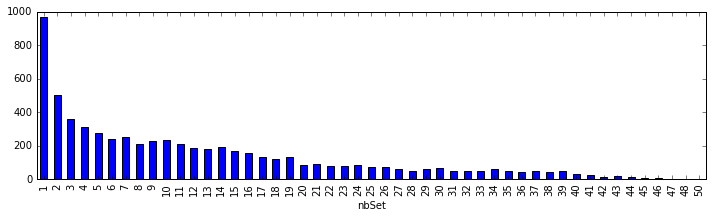

In [33]:
flemme.groupby(by="nbSet")["nbSet"].count().plot(kind="bar",figsize=(12,3))

In [34]:
print len(flemme[flemme.index=="distraire"]["infover"].str.split(";").apply(set).values[0])

27


In [35]:
lex3[(lex3["4_cgram"]=="VER") & (lex3["3_lemme"]=="distraire")]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover
37707,distraie,distRE,distraire,VER,NaN,NaN,16.0,27.77,0.02,0.20,sub:pre:1s;sub:pre:3s;
37708,distraient,distRE,distraire,VER,NaN,NaN,16.0,27.77,0.37,0.27,ind:pre:3p;sub:pre:3p;
37709,distraies,distRE,distraire,VER,NaN,NaN,16.0,27.77,0.01,0.07,sub:pre:2s;
37710,distraira,distRERa,distraire,VER,NaN,NaN,16.0,27.77,0.41,0.34,ind:fut:3s;
37711,distrairaient,distRERE,distraire,VER,NaN,NaN,16.0,27.77,0.00,0.07,cnd:pre:3p;
37712,distrairait,distRERE,distraire,VER,NaN,NaN,16.0,27.77,0.05,0.41,cnd:pre:3s;
37713,distraire,distRER,distraire,VER,NaN,NaN,16.0,27.77,7.56,13.38,inf;;inf;;inf;;
37714,distrairont,distRER§,distraire,VER,NaN,NaN,16.0,27.77,0.01,0.07,ind:fut:3p;
37715,distrais,distRE,distraire,VER,NaN,NaN,16.0,27.77,0.76,0.20,imp:pre:2s;ind:pre:1s;ind:pre:2s;
37716,distrait,distRE,distraire,VER,m,s,16.0,27.77,4.45,6.76,ind:pre:3s;par:pas;


In [36]:
Lexique3[(Lexique3["4_cgram"]=="VER") & (Lexique3["3_lemme"]=="manger")]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,...,26_orthrenv,27_phonrenv,28_orthosyll,29_cgramortho,30_deflem,31_defobs,32_old20,33_pld20,34_morphoder,35_nbmorph
79702,mange,m@Z,manger,VER,NaN,NaN,467.82,280.61,103.81,31.96,...,egnam,Z@m,man-ge,VER,100.0,20.0,1.00,1.00,manger,1.0
79707,mangea,m@Za,manger,VER,NaN,NaN,467.82,280.61,0.66,5.54,...,aegnam,aZ@m,man-gea,VER,100.0,20.0,1.55,1.05,manger,1.0
79710,mangeai,m@ZE,manger,VER,NaN,NaN,467.82,280.61,0.02,1.55,...,iaegnam,EZ@m,man-geai,VER,100.0,20.0,1.70,1.30,manger,1.0
79711,mangeaient,m@ZE,manger,VER,NaN,NaN,467.82,280.61,0.99,7.91,...,tneiaegnam,EZ@m,man-geaient,VER,100.0,20.0,1.90,1.30,manger,1.0
79714,mangeais,m@ZE,manger,VER,NaN,NaN,467.82,280.61,2.31,2.91,...,siaegnam,EZ@m,man-geais,VER,100.0,20.0,1.75,1.30,manger,1.0
79715,mangeait,m@ZE,manger,VER,NaN,NaN,467.82,280.61,4.93,20.14,...,tiaegnam,EZ@m,man-geait,VER,100.0,20.0,1.60,1.30,manger,1.0
79716,mangeant,m@Z@,manger,VER,NaN,NaN,467.82,280.61,3.13,7.57,...,tnaegnam,@Z@m,man-geant,VER,100.0,20.0,1.80,1.35,manger,1.0
79717,mangeas,m@Za,manger,VER,NaN,NaN,467.82,280.61,0.10,0.07,...,saegnam,aZ@m,man-geas,VER,100.0,20.0,1.70,1.05,manger,1.0
79718,mangeasse,m@Zas,manger,VER,NaN,NaN,467.82,280.61,0.00,0.07,...,essaegnam,saZ@m,man-geas-se,VER,100.0,20.0,2.75,1.80,manger,1.0
79719,mangent,m@Z,manger,VER,NaN,NaN,467.82,280.61,13.77,8.18,...,tnegnam,Z@m,man-gent,VER,100.0,20.0,1.75,1.00,manger,1.0


# Comparer les fréquences de Lexique3 avec Zipf
- découper les syncrétismes en cases
- converger vers la distribution de fréquences pour les syncrétismes
 - calculer la distribution moyenne
 - diviser la fréquence des syncrétismes en fonction de la moyenne
- tracer la courbe de fréquence pour les verbes

In [37]:
lemmeFilm3=verb3[(verb3["7_freqlemfilms2"]!=0)][["3_lemme","1_ortho","7_freqlemfilms2"]]
lemmeFilm3.columns=["lemme","ortho","freq"]

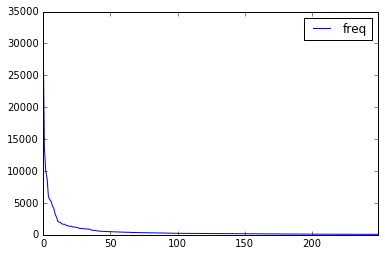

In [38]:
lemmeFilm3.groupby("lemme").first()["freq"].sort_values(ascending=False).reset_index()[:250].plot()

In [39]:
film3=verb3[(verb3["9_freqfilms2"]!=0)][["3_lemme","1_ortho","9_freqfilms2","infover"]]
film3.columns=["lemme","ortho","freq","cases"]

In [40]:
freqTable=pd.pivot_table(film3, values='freq', index=['lemme'], columns=['cases'], aggfunc=lambda x: sum(x)).reset_index().reindex()

In [41]:
freqTable.set_index("lemme")

cases,cnd:pre:1p;,cnd:pre:1s;,cnd:pre:1s;cnd:pre:2s;,cnd:pre:2p;,cnd:pre:2s;,cnd:pre:3p;,cnd:pre:3s;,imp:pre:1p;,imp:pre:1p;ind:imp:1p;ind:pre:1p;,imp:pre:1p;ind:pre:1p;,...,sub:imp:2s;,sub:imp:3p;,sub:imp:3s;,sub:pre:1p;,sub:pre:1s;,sub:pre:1s;sub:pre:3s;,sub:pre:2p;,sub:pre:2s;,sub:pre:3p;,sub:pre:3s;
lemme,,,,,,,,,,,,,,,,,,,,,
abaisser,NaN,NaN,0.13,NaN,NaN,0.01,0.02,0.02,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abandonner,0.01,NaN,0.93,0.23,NaN,0.02,0.23,NaN,NaN,1.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abasourdir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abattre,NaN,NaN,0.10,0.02,NaN,0.03,0.63,NaN,NaN,0.33,...,NaN,NaN,NaN,NaN,NaN,0.58,NaN,0.11,NaN,NaN
abdiquer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abhorrer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abjurer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abolir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abonder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
cellOrder=[c for c in freqTable.columns[1:] if not ";" in c[:-1]]+[c for c in freqTable.columns[1:] if ";" in c[:-1]]
cellOrder

['cnd:pre:1p;',
 'cnd:pre:1s;',
 'cnd:pre:2p;',
 'cnd:pre:2s;',
 'cnd:pre:3p;',
 'cnd:pre:3s;',
 'imp:pre:1p;',
 'imp:pre:2p;',
 'imp:pre:2s;',
 'ind:fut:1p;',
 'ind:fut:1s;',
 'ind:fut:2p;',
 'ind:fut:2s;',
 'ind:fut:3p;',
 'ind:fut:3s;',
 'ind:imp:1p;',
 'ind:imp:1s;',
 'ind:imp:2p;',
 'ind:imp:2s;',
 'ind:imp:3p;',
 'ind:imp:3s;',
 'ind:pas:1p;',
 'ind:pas:1s;',
 'ind:pas:2p;',
 'ind:pas:2s;',
 'ind:pas:3p;',
 'ind:pas:3s;',
 'ind:pre:1p;',
 'ind:pre:1s;',
 'ind:pre:2p;',
 'ind:pre:2s;',
 'ind:pre:3p;',
 'ind:pre:3s;',
 'inf;',
 'par:pas:fp;',
 'par:pas:fs;',
 'par:pas:m;',
 'par:pas:mp;',
 'par:pas:ms;',
 'par:pas:p;',
 'par:pre;',
 'sub:imp:1p;',
 'sub:imp:1s;',
 'sub:imp:2p;',
 'sub:imp:2s;',
 'sub:imp:3p;',
 'sub:imp:3s;',
 'sub:pre:1p;',
 'sub:pre:1s;',
 'sub:pre:2p;',
 'sub:pre:2s;',
 'sub:pre:3p;',
 'sub:pre:3s;',
 'cnd:pre:1s;cnd:pre:2s;',
 'imp:pre:1p;ind:imp:1p;ind:pre:1p;',
 'imp:pre:1p;ind:pre:1p;',
 'imp:pre:1p;ind:pre:1p;inf;',
 'imp:pre:1p;ind:pre:1p;sub:pre:2s;',
 'i

In [43]:
freqTable=freqTable.reindex_axis(["lemme"]+cellOrder, axis=1)

In [44]:
freqTable.columns=[c.strip(";") for c in freqTable.columns]

In [45]:
simplesCases=freqTable.sum()[1:54]
multiplesCases=freqTable.sum()[54:]
refFreq=simplesCases.copy()


In [46]:
convergence=0.0000000001
boolConvergence=False
while not boolConvergence:
    curFreq=simplesCases.copy()
    for m in multiplesCases.keys():
        mCases=[c for c in m.strip(";").split(";")]
        mTotal=0
        for case in mCases:
            mTotal+=refFreq[case]
        for case in mCases:
            partCase=refFreq[case]/mTotal*multiplesCases[m]
    #        print partCase,
            curFreq[case]+=partCase
    #    print
    boolFin=True
    for case in refFreq.keys():
        if (refFreq[case]-curFreq[case])/refFreq[case]>convergence:
            print case, refFreq[case],curFreq[case]
            boolFin=False
    #        break
    refFreq=curFreq.copy()
    if boolFin:
        boolConvergence=True
refFreq

cnd:pre:1p       90.64
cnd:pre:1s     1505.82
cnd:pre:2p      314.95
cnd:pre:2s     139.695
cnd:pre:3p      162.75
cnd:pre:3s     1809.05
imp:pre:1p     69.4849
imp:pre:2p     812.971
imp:pre:2s     59.5317
ind:fut:1p      332.84
ind:fut:1s     1680.56
ind:fut:2p         548
ind:fut:2s     792.872
ind:fut:3p     457.735
ind:fut:3s      2777.6
ind:imp:1p     205.747
ind:imp:1s     3524.87
ind:imp:2p     567.765
ind:imp:2s     98.3754
ind:imp:3p     534.116
ind:imp:3s     5842.83
ind:pas:1p        7.44
ind:pas:1s     847.651
ind:pas:2p       11.05
ind:pas:2s     206.448
ind:pas:3p     81.3279
ind:pas:3s     587.316
ind:pre:1p     2499.05
ind:pre:1s     17170.7
ind:pre:2p     12281.5
ind:pre:2s       14625
ind:pre:3p     5437.96
ind:pre:3s     58420.6
inf            34970.7
par:pas:fp     598.689
par:pas:fs     3094.63
par:pas:m      289.898
par:pas:mp     1522.54
par:pas:ms     20114.5
par:pas:p         3.16
par:pre        1054.32
sub:imp:1p        0.27
sub:imp:1s     1.86457
sub:imp:2p 

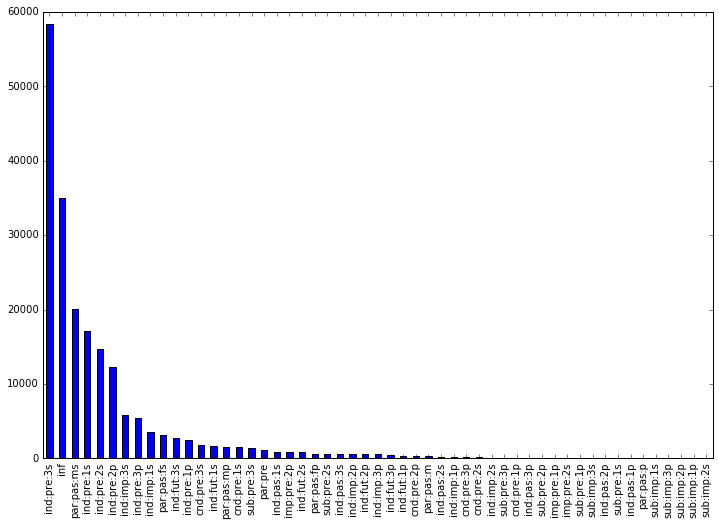

In [47]:
refFreq.sort_values(ascending=False).plot(kind="bar",figsize=(12,8))

In [48]:
"""https://github.com/cognoma/genes/blob/721204091a96e55de6dcad165d6d8265e67e2a48/2.process.py#L61-L95"""

def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.
    
    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row
    
    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [49]:
film3["case"]=film3["cases"].str[:-1]

In [50]:
splitFilm3=tidy_split(film3, "case", sep=';', keep=False)
splitFilm3

,lemme,ortho,freq,cases,case
2,avoir,a,5498.34,ind:pre:3s;,ind:pre:3s
19,abaisser,abaissai,0.10,ind:pas:1s;,ind:pas:1s
21,abaisser,abaissait,0.02,ind:imp:3s;,ind:imp:3s
23,abaisser,abaissant,0.01,par:pre;,par:pre
26,abaisser,abaisse,1.28,imp:pre:2s;ind:pre:1s;ind:pre:3s;,imp:pre:2s
26,abaisser,abaisse,1.28,imp:pre:2s;ind:pre:1s;ind:pre:3s;,ind:pre:1s
26,abaisser,abaisse,1.28,imp:pre:2s;ind:pre:1s;ind:pre:3s;,ind:pre:3s
29,abaisser,abaissent,0.05,ind:pre:3p;,ind:pre:3p
30,abaisser,abaisser,1.09,inf;,inf
31,abaisser,abaissera,0.19,ind:fut:3s;,ind:fut:3s


In [51]:
def relativeFreqs(case,cases):
    totalFreq=sum([refFreq[c] for c in cases])
    result={}
    for c in cases:
        result[c]=float(refFreq[c])/totalFreq
#    print result,result[case]
    return result[case]

def repartitionFreqCases(row):
    cases=row["cases"][:-1].split(";")
    case=row["case"]
#    print case
    if len(cases)>1:
        relFreqCase=relativeFreqs(case,cases)
        return relFreqCase*row["freq"]
    else:
        return row["freq"]

In [52]:
splitFilm3["relFreq"]=splitFilm3.apply(repartitionFreqCases,axis=1)

In [116]:
zipfFilm3=splitFilm3["relFreq"].sort_values(ascending=False).reset_index()
zipfFilm3["Verbs Lex3 FxR"]=zipfFilm3["relFreq"]*(zipfFilm3.index+1)
zipfConst=zipfFilm3["Verbs Lex3 FxR"].mean()
#zipfFilm3["FR1"]=zipfFilm3["relFreq"]*(zipfFilm3.index+1)
#zipfFilm3["FR2"]=zipfFilm3["relFreq"]*np.log(zipfFilm3.index+1)*zipfConst

In [97]:
splitFilm3["relFreq"].sort_values(ascending=False).reset_index()["relFreq"][:100].plot(figsize=(20,5))

<IPython.core.display.Javascript object>


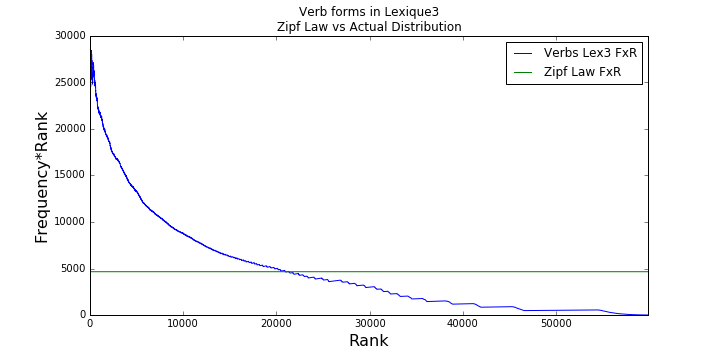

In [118]:
zipfFilm3["Zipf Law FxR"]=zipfConst
ax=zipfFilm3[["Verbs Lex3 FxR","Zipf Law FxR"]].plot(figsize=(10,5),title="Verb forms in Lexique3\nZipf Law vs Actual Distribution")
ax.set_xlabel("Rank",fontsize=16)
ax.set_ylabel("Frequency*Rank",fontsize=16)

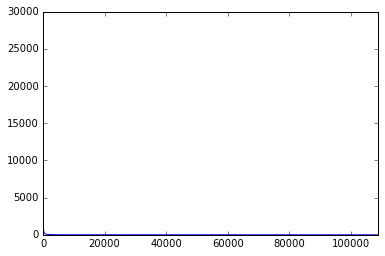

In [180]:
Lexique3[Lexique3["9_freqfilms2"]!=0]["9_freqfilms2"].sort_values(ascending=False).reset_index()["9_freqfilms2"].plot()

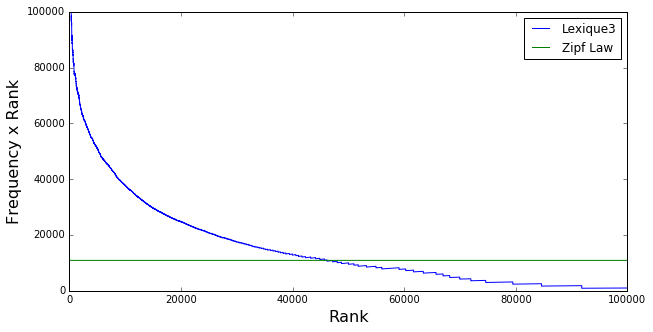

In [124]:
Lexique3["relFreq"]=Lexique3["9_freqfilms2"]
zipfLexique3=Lexique3["relFreq"].sort_values(ascending=False).reset_index()
zipfLexique3["Lexique3"]=zipfLexique3["relFreq"]*(zipfLexique3.index+1)
zipfConst=zipfLexique3["Lexique3"].mean()
zipfLexique3["Zipf Law"]=zipfConst
ax=zipfLexique3[["Lexique3","Zipf Law"]][:100000].plot(figsize=(10,5))
ax.set(xlim=(0,100000),ylim=(0,100000))
ax.set_xlabel("Rank",fontsize=16)
ax.set_ylabel("Frequency x Rank",fontsize=16)